# 梯度下降法

### 模拟梯度下降

In [1]:
import numpy as np

In [2]:
plot_x = np.linspace(-1., 6.,  141)

In [3]:
plot_y = (plot_x-2.5)**2 - 1

In [4]:
from matplotlib import  pyplot as plt

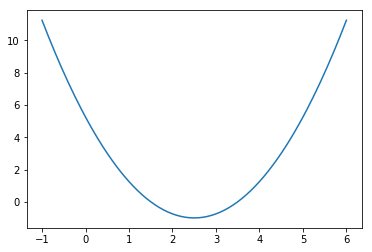

In [5]:
plt.plot(plot_x, plot_y)
plt.show()

- 定义损失函数J

In [6]:
def J(theta):
    return (theta - 2.5)**2 - 1

In [7]:
def dJ(theta):
    return 2*(theta - 2.5)

In [8]:
epsilon = 1e-8
# 学习率
eta = 0.1
theta = 0.0

In [9]:
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta*gradient
    if (abs(J(theta)-J(last_theta)) < epsilon):
        break

In [10]:
theta

2.499891109642585

In [11]:
J(theta)

-0.99999998814289

- 查看梯度下家的过程

In [12]:
theta = 0.0
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta*gradient
    theta_history.append(theta)
    if (abs(J(theta)-J(last_theta)) < epsilon):
        break

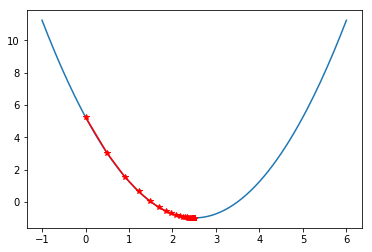

In [13]:
plt.plot(plot_x, plot_y)
plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='*')
plt.show()

In [14]:
len(theta_history)

46

### 封装成函数

In [15]:
theta_history = []
def gradient_descent(initial_theta, eta, epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta*gradient
        theta_history.append(theta)
        if (abs(J(theta)-J(last_theta)) < epsilon):
            break
def plot_theta_history():
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='*')
    plt.show()

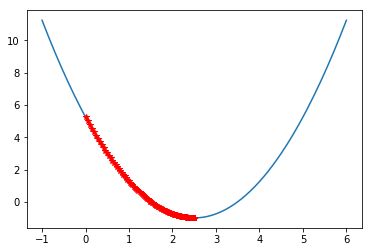

In [16]:
eta = 0.01
theta_history = []
gradient_descent(0,eta)
plot_theta_history()

In [17]:
len(theta_history)

424

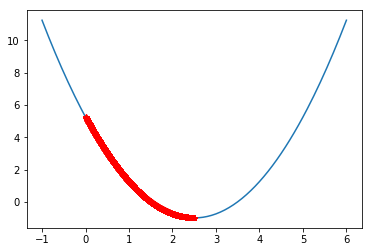

In [18]:
eta = 0.001
theta_history = []
gradient_descent(0,eta)
plot_theta_history()

In [19]:
len(theta_history)

3682

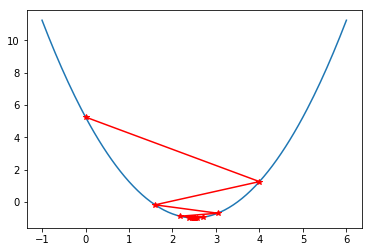

In [20]:
eta = 0.8
theta_history = []
gradient_descent(0,eta)
plot_theta_history()

In [21]:
# eta = 1.1
# theta_history = []
# gradient_descent(0,eta)
# plot_theta_history()

In [22]:
def J(theta):
    try:
        return (theta - 2.5)**2 - 1
    except:
        return float('inf')   

In [23]:
def gradient_descent(initial_theta, eta,n_iters=1e4, epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta*gradient
        theta_history.append(theta)
        if (abs(J(theta)-J(last_theta)) < epsilon):
            break
        i_iter +=1
def plot_theta_history():
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='*')
    plt.show()

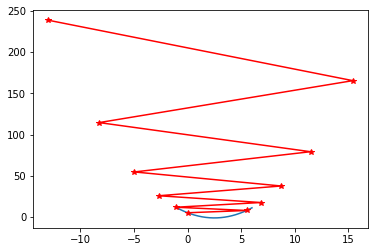

In [24]:
eta = 1.1
theta_history = []
gradient_descent(0,eta, n_iters=10)
plot_theta_history()

# 多元回归的梯度下降

- 在线性回归模型中使用梯度下降法

In [25]:
np.random.seed(666)

In [26]:
x = 2 * np.random.random(size = 100)

In [27]:
x.shape

(100,)

In [28]:
y = x *3. +4. + np.random.normal(size=100)

In [29]:
X = x.reshape(-1, 1)

In [30]:
X.shape

(100, 1)

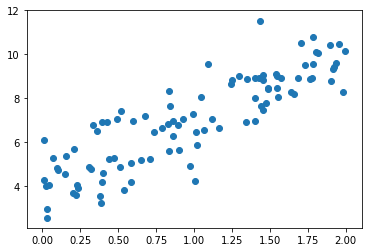

In [31]:
plt.scatter(x, y)
plt.show()

- 使用梯度下降法进行训练

In [32]:
def J(theta, X_b, y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/ len(X_b)
    except:
        return float('inf')  

In [33]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) -y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) -y).dot(X_b[:,i])
    return res*2/len(X_b)

In [34]:
def gradient_descent( X_b, y,initial_theta, eta,n_iters=1e4, epsilon = 1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta*gradient
        if (abs(J(theta, X_b, y)-J(last_theta, X_b, y)) < epsilon):
            break
        i_iter +=1
    return theta
def plot_theta_history():
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='*')
    plt.show()

In [35]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
gradient_descent(X_b, y, initial_theta, eta)

array([4.02145786, 3.00706277])

In [36]:
# fit_gd()

In [41]:
from myscript.LinearRegression import LinearRegression

In [45]:
lin_reg = LinearRegression()

In [46]:
X.shape

(100, 1)

In [47]:
lin_reg.fit_gd(X, y)

LinearRegression()

In [48]:
lin_reg.coef_

array([3.00706277])

In [49]:
lin_reg.intercept_

4.021457858204859

In [52]:
arr = np.arange(16).reshape(1,-1)
arr.shape

(1, 16)

In [53]:
len(arr)

1